In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("aTc_dotarea.csv")
df.head()

,date,concentration,number,image,z_stack,area
0,90524,1,3,39,5,34
1,90524,1,3,39,6,45
2,90524,1,3,39,9,11
3,90524,1,3,39,9,76
4,90524,1,3,39,9,3


In [4]:
# calculate the mean area for each concentration and biological replicate
df_mean = df.groupby(['concentration', 'number'], as_index=False)['area'].mean()
df_mean

,concentration,number,area
0,1,1,27.038462
1,1,2,20.142857
2,1,3,13.000000
3,10,1,16.060606
4,10,2,24.303030
5,10,3,21.593750


In [5]:
# calculate sem and mean for each concentration
df_error = df.groupby('concentration', as_index=False)['area'].mean()
df_error['sem'] = df_mean.groupby(['concentration'])['area'].std().values / np.sqrt(3)
df_error

,concentration,area,sem
0,1,21.909091,4.052764
1,10,20.642857,2.425483


## t-test (paired)

In [6]:
# t-test between aTc1 and aTc10 (paired)
aTc1_area = df_mean[df_mean["concentration"] == 1]["area"]
aTc10_area = df_mean[df_mean["concentration"] == 10]["area"]
statistic, pvalue = stats.ttest_rel(aTc1_area, aTc10_area)
pvalue

0.929519940162987

In [7]:
# no significance

## data visualization

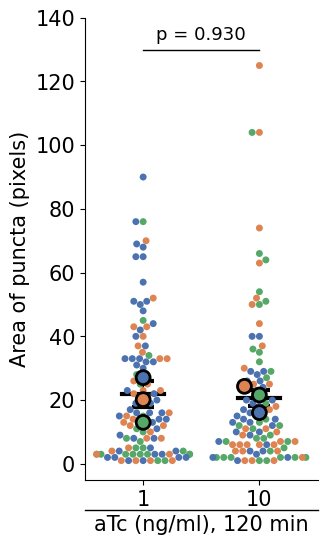

In [8]:
fontsize=15
fig, ax = plt.subplots(figsize = (3, 6), dpi=100)
# small dots for individual data points and large dots for mean
ax1 = sns.swarmplot(x="concentration", y="area", data=df, hue='number', size=5, palette='deep')
ax2 = sns.swarmplot(x='concentration', y='area', data=df_mean,\
                    hue='number', size=10, palette='deep', edgecolor='k', linewidth=2)
ax.errorbar(x=[0, 1], y='area', yerr='sem', data=df_error, \
            capsize=8, fmt=' ', ecolor='k', capthick=3
            )
# horizontal line for the mean (somehow could not change by ax.errorbar)
diff = 0.18
ax.plot([0-diff, 0+diff], [df_error['area'].iloc[0], df_error['area'].iloc[0]], lw=3, color='k')
ax.plot([1-diff, 1+diff], [df_error['area'].iloc[1], df_error['area'].iloc[1]], lw=3, color='k')
# setting of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# setting of x axis
ax.set_xlim(-0.5, 1.5)
ax.set_xlabel("aTc (ng/ml), 120 min", fontsize=fontsize)
ax.set_xticks([0, 1])
ax.set_xticklabels(["1", "10"], fontsize=fontsize)
# setting of y axis
ax.set_ylim(-5, 140)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])
ax.set_yticklabels(["0", "20", "40", "60", "80", "100", "120", "140"], fontsize=fontsize)
ax.set_ylabel("Area of puncta (pixels)", fontsize=fontsize)
# p value
y=130
ax.plot([0, 1], [y, y], lw=1, color='k')
ax.text(0.5, y+3, f"p = {pvalue:.3f}", ha="center", fontsize=fontsize-2)
# 
ax.plot([-0.5, 1.5], [-14.5,-14.5], lw=1, color='k', clip_on=False)


ax.legend().remove()
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()